State
Alabama                 36.294118
Alaska                  23.666667
Arizona                 42.076923
Arkansas                33.636364
California              36.976190
Colorado                33.074074
Connecticut             33.000000
Country Of Mexico       68.000000
Delaware                41.666667
District Of Columbia    40.000000
Florida                 37.000000
Georgia                 38.633333
Hawaii                  67.750000
Idaho                   22.500000
Illinois                29.807692
Indiana                 30.187500
Iowa                    36.444444
Kansas                  30.700000
Kentucky                26.523810
Louisiana               36.600000
Maine                   34.400000
Maryland                39.000000
Massachusetts           39.615385
Michigan                31.947368
Minnesota               35.000000
Mississippi             32.000000
Missouri                32.454545
Montana                 41.733333
Nebraska                27.750000
Nevada  

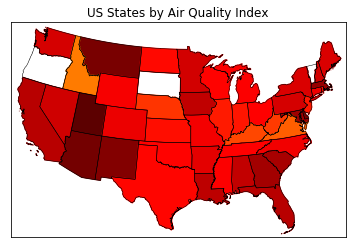

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from io import StringIO
import requests
import json
import pandas as pd


map = Basemap(llcrnrlon = -119, llcrnrlat = 22, urcrnrlon = -64, urcrnrlat = 49, projection = 'lcc', lat_1 = 33,lat_2 = 45, lon_0 = -95)


map.readshapefile('st99_d00', name='states', drawbounds=True)

data = pd.read_csv("/Users/ritikachadha/Documents/big_data/annual_aqi_by_county_2017.csv")

tmp_df = data[['State', 'County', 'Median AQI']]
data=tmp_df.groupby(['State'])['Median AQI'].mean()
print(data)

vmin = 0; vmax = 50 
for shape in m.states_info:
    state = shape['NAME']
    
    if state not in ['District of Columbia','Puerto Rico','Oregon','Vermont','South Dakota']:
        poll = data[state]
        colors[state] = cmap(1.-((poll-vmin)/(vmax-vmin)))
    statenames.append(state)

ax = plt.gca() 
for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ['District of Columbia','Puerto Rico','Oregon','Vermont','South Dakota']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('US States by Air Quality Index')
plt.show()



In [1]:
import pixiedust#Loading the Dataset from External URL
data1= pixiedust.sampleData("https://raw.githubusercontent.com/akhilbh92/spartans/master/annual_aqi_by_county_20171.csv")

Pixiedust database opened successfully


/usr/local/src/bluemix_jupyter_bundle.v62/notebook/lib/python2.7/site-packages/bokeh/core/json_encoder.py:52: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  NP_EPOCH = np.datetime64('1970-01-01T00:00:00Z')


In [2]:
#Loading the Dataset from External URL
data1= pixiedust.sampleData("https://raw.githubusercontent.com/akhilbh92/spartans/master/annual_aqi_by_county_20171.csv")

Downloaded 43739 bytes
Creating pySpark DataFrame for 'https://raw.githubusercontent.com/akhilbh92/spartans/master/annual_aqi_by_county_20171.csv'. Please wait...
Loading file using 'com.databricks.spark.csv'
Successfully created pySpark DataFrame for 'https://raw.githubusercontent.com/akhilbh92/spartans/master/annual_aqi_by_county_20171.csv'


In [3]:
display(data1)

State,County,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
Alabama,Baldwin,48,45,3,0,0,0,0,58,49,36,0,0,27,0,21,0
Alabama,Clay,27,20,7,0,0,0,0,66,60,36,0,0,0,0,27,0
Alabama,Colbert,51,47,4,0,0,0,0,63,46,41,0,0,28,0,23,0
Alabama,DeKalb,68,64,4,0,0,0,0,57,45,36,0,0,50,0,18,0
Alabama,Elmore,14,14,0,0,0,0,0,47,47,41,0,0,14,0,0,0
Alabama,Etowah,87,54,33,0,0,0,0,90,62,47,0,0,7,0,80,0
Alabama,Houston,49,44,4,1,0,0,0,131,51,38,0,0,27,0,22,0
Alabama,Jefferson,120,49,67,4,0,0,0,116,79,54,0,2,28,30,60,0
Alabama,Madison,45,44,1,0,0,0,0,65,43,10,0,0,0,0,18,27
Alabama,Mobile,90,71,17,2,0,0,0,139,53,40,0,0,18,2,70,0


In [4]:
#List of States in the Survey
print "Total No of States in the Survey",data1.select("State").distinct().count()
data1.select("State").distinct().show(49)

Total No of States in the Survey 49
+--------------------+
|               State|
+--------------------+
|               Idaho|
|            Michigan|
|               Texas|
|       West Virginia|
|           Louisiana|
|   Country Of Mexico|
|         Connecticut|
|             Florida|
|            Arkansas|
|        North Dakota|
|             Montana|
|              Kansas|
|           Wisconsin|
|             Wyoming|
|        Pennsylvania|
|              Hawaii|
|          Washington|
|            Missouri|
|           Tennessee|
|            New York|
|            Colorado|
|District Of Columbia|
|         Mississippi|
|                Ohio|
|                Iowa|
|              Alaska|
|      North Carolina|
|          New Mexico|
|              Nevada|
|          California|
|             Georgia|
|            Oklahoma|
|                Utah|
|             Arizona|
|      South Carolina|
|            Virginia|
|             Indiana|
|       New Hampshire|
|            Maryland

In [5]:
#List the states with their corresponding no of counties 
data1.groupby('State').agg({'County': 'count'}).show(50)

+--------------------+-------------+
|               State|count(County)|
+--------------------+-------------+
|               Idaho|            6|
|            Michigan|           19|
|               Texas|           46|
|       West Virginia|           13|
|           Louisiana|           20|
|   Country Of Mexico|            1|
|         Connecticut|            1|
|             Florida|            2|
|            Arkansas|           11|
|        North Dakota|           11|
|             Montana|           15|
|              Kansas|           10|
|           Wisconsin|           17|
|             Wyoming|           14|
|        Pennsylvania|            6|
|              Hawaii|            4|
|          Washington|           28|
|            Missouri|           22|
|           Tennessee|           17|
|            New York|           31|
|            Colorado|           27|
|District Of Columbia|            1|
|         Mississippi|            1|
|                Ohio|           41|
|

In [6]:
# Visualize the Number of Counties in each State participated in the Survey

visual_data = data1.groupBy("State").count()
display(visual_data)

In [14]:
data1.registerTempTable("aqitable")
lasDF1 = sqlContext.sql("""
Select State,COUNT(County) AS No_Of_Counties FROM aqitable group by State order by No_Of_Counties desc LIMIT 25
""")
lasDF1.show(25)
display(lasDF1)


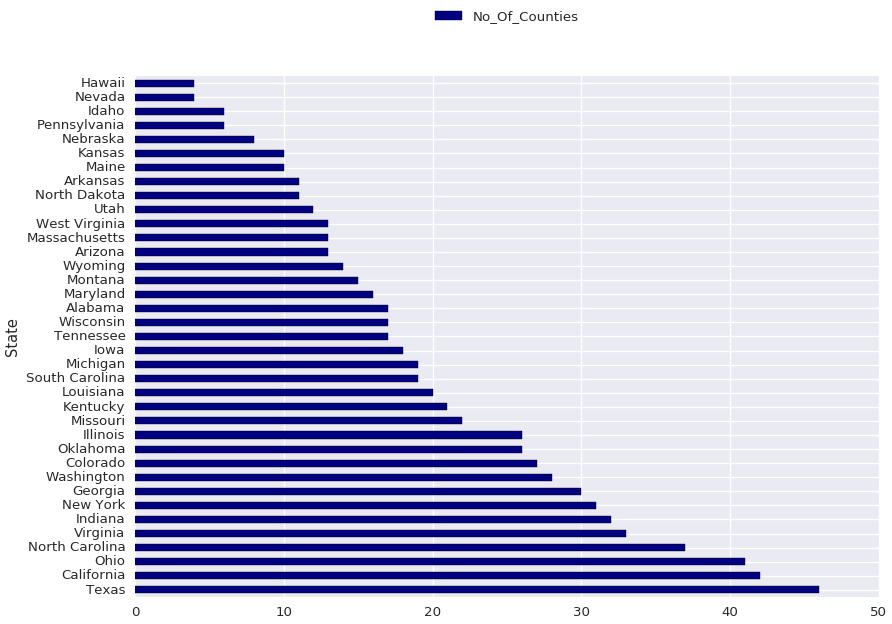

In [15]:
#List and visualize the states having more than 3 counties in the survey
data1.registerTempTable("aqitable")
lasDF = sqlContext.sql("""
SELECT State,COUNT(County) AS No_Of_Counties FROM aqitable group by State having No_Of_Counties >3 order by No_Of_Counties desc
""")
lasDF.show(50)
display(lasDF)

In [16]:
# The code was removed by DSX for sharing.

,State,County,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,48,45,3,0,0,0,0,58,49,36,0,0,27,0,21,0
1,Alabama,Clay,27,20,7,0,0,0,0,66,60,36,0,0,0,0,27,0
2,Alabama,Colbert,51,47,4,0,0,0,0,63,46,41,0,0,28,0,23,0
3,Alabama,DeKalb,68,64,4,0,0,0,0,57,45,36,0,0,50,0,18,0
4,Alabama,Elmore,14,14,0,0,0,0,0,47,47,41,0,0,14,0,0,0


In [17]:
# Renaming columns for computations
data.columns = ['State','Places','Days_with_AQI','Good_Days','Moderate_Days','Unhealthy_for_Sensitive_Groups_Days','Unhealthy_Days','Very_Unhealthy_Days','Hazardous_Days','Max_AQI','90th_Percentile_AQI','Median_AQI','Days_CO','Days_NO2','Days_Ozone','Days_SO2','Days_PM2.5','Days_PM10']

In [18]:
# Details of Dataset. First five rows are displayed.
data.head()

,State,Places,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days,Max_AQI,90th_Percentile_AQI,Median_AQI,Days_CO,Days_NO2,Days_Ozone,Days_SO2,Days_PM2.5,Days_PM10
0,Alabama,Baldwin,48,45,3,0,0,0,0,58,49,36,0,0,27,0,21,0
1,Alabama,Clay,27,20,7,0,0,0,0,66,60,36,0,0,0,0,27,0
2,Alabama,Colbert,51,47,4,0,0,0,0,63,46,41,0,0,28,0,23,0
3,Alabama,DeKalb,68,64,4,0,0,0,0,57,45,36,0,0,50,0,18,0
4,Alabama,Elmore,14,14,0,0,0,0,0,47,47,41,0,0,14,0,0,0


In [19]:
# Information about Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 754
Data columns (total 18 columns):
State                                  755 non-null object
Places                                 755 non-null object
Days_with_AQI                          755 non-null int64
Good_Days                              755 non-null int64
Moderate_Days                          755 non-null int64
Unhealthy_for_Sensitive_Groups_Days    755 non-null int64
Unhealthy_Days                         755 non-null int64
Very_Unhealthy_Days                    755 non-null int64
Hazardous_Days                         755 non-null int64
Max_AQI                                755 non-null int64
90th_Percentile_AQI                    755 non-null int64
Median_AQI                             755 non-null int64
Days_CO                                755 non-null int64
Days_NO2                               755 non-null int64
Days_Ozone                             755 non-null int64
Days_SO2               

In [20]:
# List of States based on the number of places used for surveys. 

state_with_most_places = data.groupby('State').size().sort_values(ascending=False)
state_with_most_places

State
Texas                   46
California              42
Ohio                    41
North Carolina          37
Virginia                33
Indiana                 32
New York                31
Georgia                 30
Washington              28
Colorado                27
Oklahoma                26
Illinois                26
Missouri                22
Kentucky                21
Louisiana               20
South Carolina          19
Michigan                19
Iowa                    18
Wisconsin               17
Tennessee               17
Alabama                 17
Maryland                16
Montana                 15
Wyoming                 14
West Virginia           13
Arizona                 13
Massachusetts           13
Utah                    12
Arkansas                11
North Dakota            11
Kansas                  10
Maine                   10
Nebraska                 8
Pennsylvania             6
Idaho                    6
Nevada                   4
Hawaii                

In [21]:
# Total number of States used for survey
state_with_most_places.count()

49

In [22]:
# Deleting the States that have less than three places listed for Survey.
data = data[(data.State != 'District Of Columbia') & (data.State != 'New Mexico') & (data.State != 'Florida') & (data.State != 'Mississippi') & (data.State != 'Connecticut') & (data.State != 'Country Of Mexico') & (data.State != 'New Jersey') & (data.State != 'New Hampshire') & (data.State != 'Minnesota')]

In [23]:
# New count of States used in the survey
Data_with_AQI=data.groupby('State').size().sort_values(ascending=False)
Data_with_AQI.count()

40

In [24]:
# Top 10 States that provided maximum number of 'Days with AQI' data (Mean data).

import numpy as np
Max_Days = data.groupby('State').agg({'Days_with_AQI': [np.size, np.mean]})
Max_Days.sort_values([('Days_with_AQI', 'mean')], ascending=False)[:10]

Days_with_AQI            
                        size        mean
State                                   
Delaware                   3  119.666667
Louisiana                 20  118.700000
Utah                      12  115.583333
Maine                     10  103.500000
South Carolina            19  100.000000
Iowa                      18   92.833333
Alaska                     3   92.666667
Oklahoma                  26   91.346154
Arizona                   13   89.307692
Massachusetts             13   89.230769

,State,County,Max AQI
64,California,Riverside,365
146,Georgia,Richmond,364
151,Hawaii,Hawaii,277
73,California,Santa Barbara,264
32,Arizona,Yuma,235
23,Arizona,Gila,200
237,Kansas,Ford,187
639,Utah,Cache,167
647,Utah,Utah,161
376,Montana,Missoula,160


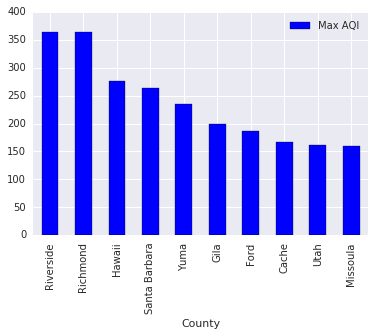

In [25]:
# The code was removed by DSX for sharing.

,State,County,Median AQI
20,Arizona,Apache,10
21,Arizona,Cochise,44
22,Arizona,Coconino,43
23,Arizona,Gila,100
24,Arizona,La Paz,39
25,Arizona,Maricopa,50
26,Arizona,Mohave,9
27,Arizona,Navajo,39
28,Arizona,Pima,45
29,Arizona,Pinal,41


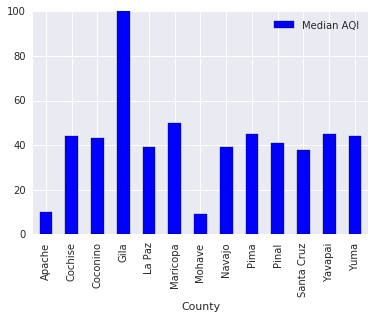

In [26]:
# The code was removed by DSX for sharing.